<a href="https://colab.research.google.com/github/hsuanchengsun/Natural-Language-Processing/blob/main/Text_Access_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**text access and preprocessing**

# Step 1: Extract all reviews

In [ ]:
# Import useful modules

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
import time 
import random 

In [ ]:
# Parse the homepage of a business
url = 'https://www.yelp.com/biz/rheumatology-center-upland?osq=doctors'
# Make a GET request to the target URL to get the raw HTML data
response = requests.get(url).text
# Use BeautifulSoup to parse HTML
soup = BeautifulSoup(response,'html.parser')

In [ ]:
# By checking webpage, total review number is the class css-1p9ibgf

number_reviews = soup.find (class_=' css-1p9ibgf').text

In [ ]:
number_reviews

'43 reviews'

In [ ]:
#Use re to extract the numbers from a string 
number_reviews = int(re.findall('\d+', number_reviews)[0])
print (number_reviews)

43


In [ ]:
# create a loop thorugh the URL pattern
url_list = []
for i in range (0, number_reviews, 10):
  url_list.append('https://www.yelp.com/biz/rheumatology-center-upland?osq=doctors&start='+str(i))
print(*url_list, sep='\n')

https://www.yelp.com/biz/rheumatology-center-upland?osq=doctors&start=0
https://www.yelp.com/biz/rheumatology-center-upland?osq=doctors&start=10
https://www.yelp.com/biz/rheumatology-center-upland?osq=doctors&start=20
https://www.yelp.com/biz/rheumatology-center-upland?osq=doctors&start=30
https://www.yelp.com/biz/rheumatology-center-upland?osq=doctors&start=40


In [ ]:
# Test on the first url
url = url_list[0]
response = requests.get(url).text
soup = BeautifulSoup(response,'html.parser')

In [ ]:
# By checking webpage, review part is the class review__09f24__oHr9V border-color--default__09f24__NPAKY

results = soup.findAll(class_=' review__09f24__oHr9V border-color--default__09f24__NPAKY')
print (len(results))

10


In [ ]:
# pick one review to test
review = results[0]
# By checking webpage, user name is the class css-1m051bw
username = review.find(class_='css-1m051bw').text
print (username)

Dustin C.


In [ ]:
# extract attribute value using the key aria-label for star ratings. 
rating = review.find (class_=' five-stars__09f24__mBKym five-stars--regular__09f24__DgBNj display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY')['aria-label']
print (rating)

5 star rating


In [ ]:
# \d+ is a rgular exression pattern to extract numbers from a string
rating = float (re.findall('\d+', rating)[0])
print (rating)

5.0


In [ ]:
# By checking webpage, date is the class css-chan6m
review_date = review.find (class_=' css-chan6m').text
print(review_date)

11/4/2018


In [ ]:
# retrieve all review content
review_content = review.find(class_=' raw__09f24__T4Ezm', attrs={'lang':'en'}).text
print (review_content)

Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we're puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended.


In [ ]:
# create a list of review from one person
single_review =[username, rating, review_date, review_content]
print(single_review)

['Dustin C.', 5.0, '11/4/2018', "Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we're puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended."]


In [ ]:
# create a list of all review deatils of a single page 
single_page_review = []
for review in results:
  # retrieve user name
  username = review.find (class_='css-1m051bw').text
  # extract attribute value using the key aria-label for star ratings. 
  rating = review.find (class_=' five-stars__09f24__mBKym five-stars--regular__09f24__DgBNj display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY')['aria-label']
  # \d+ is a rgular exression pattern to extract numbers from a string
  rating = float (re.findall('\d+', rating)[0])
  # extract date of review; same use inspect to find that it is a span class
  review_date = review.find (class_=' css-chan6m').text
  # retrieve all review content
  review_content = review.find(class_=' raw__09f24__T4Ezm', attrs={'lang':'en'}).text
  single_review =[username, rating, review_date,review_content]
  print (single_review)
  single_page_review.append (single_review)

['Dustin C.', 5.0, '11/4/2018', "Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we're puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended."]
['Shop 1.', 1.0, '7/14/2022', 'If you want to be berated and treated like dirt by the staff, then definitely call this office. Phone etiquette is zero & the way the staff speaks to callers certainly reflects on the doctors who allow it.']
['Margot S.', 5.0, '2/23/2022', "Dr. Sadeghi is 

In [ ]:
print (*single_page_review, sep='\n')

['Dustin C.', 5.0, '11/4/2018', "Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we're puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended."]
['Shop 1.', 1.0, '7/14/2022', 'If you want to be berated and treated like dirt by the staff, then definitely call this office. Phone etiquette is zero & the way the staff speaks to callers certainly reflects on the doctors who allow it.']
['Margot S.', 5.0, '2/23/2022', "Dr. Sadeghi is 

In [ ]:
# Create a function to process all single page reviews based on an URL input

def scrape_single_review (url):
    response = requests.get(url).text
    # Use BeautifulSoup to parse HTML
    soup = BeautifulSoup(response,'html.parser')
    # get all content for one review
    results = soup.findAll (class_=' review__09f24__oHr9V border-color--default__09f24__NPAKY')
    single_page_review = []
    for review in results:
      # retrieve user name
      username = review.find (class_='css-1m051bw').text
      # extract attribute value using the key aria-label for star ratings. 
      rating = review.find (class_=' five-stars__09f24__mBKym five-stars--regular__09f24__DgBNj display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY')['aria-label']
      # \d+ is a rgular exression pattern to extract numbers from a string
      rating = float (re.findall('\d+', rating)[0])
      # extract date of review; same use inspect to find that it is a span class
      review_date = review.find (class_=' css-chan6m').text
      # retrieve all review content
      review_content = review.find(class_=' raw__09f24__T4Ezm', attrs={'lang':'en'}).text
      single_review =[username, rating, review_date,review_content]
      print (single_review)
      single_page_review.append (single_review)
    return single_page_review

In [ ]:
# test the function using one URL
r = scrape_single_review ('https://www.yelp.com/biz/rheumatology-center-upland?osq=doctors&start=0')
# check the shape of the array
np.asarray(r).shape

['Dustin C.', 5.0, '11/4/2018', "Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we're puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended."]
['Shop 1.', 1.0, '7/14/2022', 'If you want to be berated and treated like dirt by the staff, then definitely call this office. Phone etiquette is zero & the way the staff speaks to callers certainly reflects on the doctors who allow it.']
['Margot S.', 5.0, '2/23/2022', "Dr. Sadeghi is 

(10, 4)

In [ ]:
print (*r, sep='\n')

['Dustin C.', 5.0, '11/4/2018', "Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we're puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended."]
['Shop 1.', 1.0, '7/14/2022', 'If you want to be berated and treated like dirt by the staff, then definitely call this office. Phone etiquette is zero & the way the staff speaks to callers certainly reflects on the doctors who allow it.']
['Margot S.', 5.0, '2/23/2022', "Dr. Sadeghi is 

In [ ]:
all_reviews = []
for index, url in enumerate(url_list):
  all_reviews = all_reviews + scrape_single_review (url)
  # random sleep to avoid getting banned by Yelp 
  print(*all_reviews, sep= '\n')
  time.sleep (random.randint(30, 40))
  # log the progress
  print('finished page' + str(index+1))

['Dustin C.', 5.0, '11/4/2018', "Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we're puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended."]
['Shop 1.', 1.0, '7/14/2022', 'If you want to be berated and treated like dirt by the staff, then definitely call this office. Phone etiquette is zero & the way the staff speaks to callers certainly reflects on the doctors who allow it.']
['Margot S.', 5.0, '2/23/2022', "Dr. Sadeghi is 

In [ ]:
# check the shape of the all reviews to know all reviews are retrieved. 
np.shape (all_reviews)

(43, 4)

# Step 2: Write the retrieved review to a .csv file

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# let's go to My Drive
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# And go to Colab Notebooks
%cd Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Create Mydata folder 
%mkdir Mydata

In [ ]:
# use the df to save the data
df = pd.DataFrame(all_reviews)
df.columns = ['user_name', 'rating', 'review_date', 'review']
df.head(3)

,user_name,rating,review_date,review
0,Dustin C.,5.0,11/4/2018,"Awesome team, very knowledgeable. My wife was ..."
1,Shop 1.,1.0,7/14/2022,If you want to be berated and treated like dir...
2,Margot S.,5.0,2/23/2022,Dr. Sadeghi is an absolutely outstanding physi...


In [ ]:
# saving the data frame to the google drive folder
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/all_reviews.csv', index = False)

# Step 3: Tokenization

In [ ]:
# Import useful modules

import pandas as pd
import numpy as np
import re
import time 
import random 

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read review data from online folder

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/all_reviews.csv')

In [ ]:
df.head()

,user_name,rating,review_date,review
0,Dustin C.,5.0,11/4/2018,"Awesome team, very knowledgeable. My wife was ..."
1,Shop 1.,1.0,7/14/2022,If you want to be berated and treated like dir...
2,Margot S.,5.0,2/23/2022,Dr. Sadeghi is an absolutely outstanding physi...
3,Maxine S.,1.0,11/23/2021,Dr KOHKAB- help!!! This clinic is going down f...
4,Nana L.,1.0,10/6/2021,Good news and BAD news about this office. Firs...


In [ ]:
# setup NLTK
!pip install nltk
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# apply contraction expansion before tokenization
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 5.1 MB/s 
     |████████████████████████████████| 106 kB 22.7 MB/s 


In [ ]:
# Convert dataframe to list

all_reviews = df.values.tolist()

In [ ]:
print(*all_reviews, sep= '\n')

['Dustin C.', 5.0, '11/4/2018', "Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we're puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended."]
['Shop 1.', 1.0, '7/14/2022', 'If you want to be berated and treated like dirt by the staff, then definitely call this office. Phone etiquette is zero & the way the staff speaks to callers certainly reflects on the doctors who allow it.']
['Margot S.', 5.0, '2/23/2022', "Dr. Sadeghi is 

In [ ]:
# Test on one review first
all_reviews[0][3]

"Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we're puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended."

In [ ]:
# creating an empty word list
expanded_word = []    
for word in all_reviews[0][3].split():
  # using contractions.fix to expand the shotened words
  expanded_word.append(contractions.fix(word))   

# let's see the differences    
expanded_text = ' '.join(expanded_word)
print('Original text: ' + all_reviews[0][3])
print('Expanded_text: ' + expanded_text)

Original text: Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we're puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended.
Expanded_text: Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off pr

In [ ]:
# Create a function to do contraction expansion for each input sentense
def contractionExpansion(sentense):
  expanded_word = []    
  for word in sentense.split():
  # using contractions.fix to expand the shotened words
    expanded_word.append(contractions.fix(word))  
  expanded_text = ' '.join(expanded_word) 
  return expanded_text

In [ ]:
# Convert every reviews in the list
print('Original text: ' + all_reviews[-1][3])
for i in range(len(all_reviews)):
  all_reviews[i][3] = contractionExpansion(all_reviews[i][3])

print('Expanded_text: ' + all_reviews[-1][3])

Original text: OMG! This Urgent Care is great! Since I couldnt be seen at my regular Dr.'s office, not a good thing especially since I was having trouble breathing due to my asthma, I looked for an Urgent Care close to my house. I read the reviews for this location and they were all good. So I went. This place is so nice. Its pretty and clean, not like  the ones that look like a workmans comp place. I think I was there for almost an hour, including filling out paperwork and my treatment. Amanda was the nurse who helped me, she was Very nice. I recommend this place to anyone who wants or needs help right away.  Thank you , jparedes
Expanded_text: OMG! This Urgent Care is great! Since I could not be seen at my regular Dr.'s office, not a good thing especially since I was having trouble breathing due to my asthma, I looked for an Urgent Care close to my house. I read the reviews for this location and they were all good. So I went. This place is so nice. Its pretty and clean, not like the 

In [ ]:
print(*all_reviews, sep= '\n')

['Dustin C.', 5.0, '11/4/2018', 'Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we are puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended.']
['Shop 1.', 1.0, '7/14/2022', 'If you want to be berated and treated like dirt by the staff, then definitely call this office. Phone etiquette is zero & the way the staff speaks to callers certainly reflects on the doctors who allow it.']
['Margot S.', 5.0, '2/23/2022', "Dr. Sadeghi is

In [ ]:
# Get all the review contents
reviews = []
for i in range(len(all_reviews)):
  reviews.append(all_reviews[i][3])
print(*reviews, sep= '\n')

Awesome team, very knowledgeable. My wife was seen and recommended by Gloria Stevens, MD (who is also within the same business complex) -- we were seen rather quick, and quickly the doctor was able to get on the same page. She asked key questions, added a steroid to help cycle my wife off prednisone and was very helpful throughout the entire process. My wife left with comfort, and hope. My wife is battling an autoimmune disease which is 50/50 either Chrons or Henoch-Schonlein -- we are puzzling this all together and are hoping its just Henoch-Schonlein. We will know very soon as my wife has biopsies pending USC, and then a followup with the GI Doctor.Highly recommended.
If you want to be berated and treated like dirt by the staff, then definitely call this office. Phone etiquette is zero & the way the staff speaks to callers certainly reflects on the doctors who allow it.
Dr. Sadeghi is an absolutely outstanding physician. He is extremely knowledgeable about rheumatological conditions 

In [ ]:
# Since I do not use sentense tokenizer first, so I decide to use wordtokernize function directly
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# test on one review
print(word_tokenize(reviews[0]))
print(len(word_tokenize(reviews[0])))

['Awesome', 'team', ',', 'very', 'knowledgeable', '.', 'My', 'wife', 'was', 'seen', 'and', 'recommended', 'by', 'Gloria', 'Stevens', ',', 'MD', '(', 'who', 'is', 'also', 'within', 'the', 'same', 'business', 'complex', ')', '--', 'we', 'were', 'seen', 'rather', 'quick', ',', 'and', 'quickly', 'the', 'doctor', 'was', 'able', 'to', 'get', 'on', 'the', 'same', 'page', '.', 'She', 'asked', 'key', 'questions', ',', 'added', 'a', 'steroid', 'to', 'help', 'cycle', 'my', 'wife', 'off', 'prednisone', 'and', 'was', 'very', 'helpful', 'throughout', 'the', 'entire', 'process', '.', 'My', 'wife', 'left', 'with', 'comfort', ',', 'and', 'hope', '.', 'My', 'wife', 'is', 'battling', 'an', 'autoimmune', 'disease', 'which', 'is', '50/50', 'either', 'Chrons', 'or', 'Henoch-Schonlein', '--', 'we', 'are', 'puzzling', 'this', 'all', 'together', 'and', 'are', 'hoping', 'its', 'just', 'Henoch-Schonlein', '.', 'We', 'will', 'know', 'very', 'soon', 'as', 'my', 'wife', 'has', 'biopsies', 'pending', 'USC', ',', 'an

In [ ]:
# create tokenized reviews
review_token_list = [word_tokenize(review) for review in reviews] # list comprehension
print(*review_token_list[:5], sep= '\n')

['Awesome', 'team', ',', 'very', 'knowledgeable', '.', 'My', 'wife', 'was', 'seen', 'and', 'recommended', 'by', 'Gloria', 'Stevens', ',', 'MD', '(', 'who', 'is', 'also', 'within', 'the', 'same', 'business', 'complex', ')', '--', 'we', 'were', 'seen', 'rather', 'quick', ',', 'and', 'quickly', 'the', 'doctor', 'was', 'able', 'to', 'get', 'on', 'the', 'same', 'page', '.', 'She', 'asked', 'key', 'questions', ',', 'added', 'a', 'steroid', 'to', 'help', 'cycle', 'my', 'wife', 'off', 'prednisone', 'and', 'was', 'very', 'helpful', 'throughout', 'the', 'entire', 'process', '.', 'My', 'wife', 'left', 'with', 'comfort', ',', 'and', 'hope', '.', 'My', 'wife', 'is', 'battling', 'an', 'autoimmune', 'disease', 'which', 'is', '50/50', 'either', 'Chrons', 'or', 'Henoch-Schonlein', '--', 'we', 'are', 'puzzling', 'this', 'all', 'together', 'and', 'are', 'hoping', 'its', 'just', 'Henoch-Schonlein', '.', 'We', 'will', 'know', 'very', 'soon', 'as', 'my', 'wife', 'has', 'biopsies', 'pending', 'USC', ',', 'an

In [ ]:
# use pyspellchecker to list potential misspells
!pip install pyspellchecker

from spellchecker import SpellChecker
spell = SpellChecker()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.1 MB/s 


In [ ]:
# find those words that may be misspelled for the first review
misspelled = spell.unknown(review_token_list[0])
misspelled

{'--',
 '50/50',
 'chrons',
 'doctor.highly',
 'followup',
 'henoch-schonlein',
 'md'}

In [ ]:
# Now I would try the other tokenizer wordpunct_tokenize to see the misspelled
from nltk.tokenize import wordpunct_tokenize

In [ ]:
# Compare the outpyt of word_tokenize() versus wordpunct_tokenize()
print(word_tokenize(reviews[0]))
print(len(word_tokenize(reviews[0])))
print("-------------")
print(wordpunct_tokenize(reviews[0]))
print(len(wordpunct_tokenize(reviews[0])))

['Awesome', 'team', ',', 'very', 'knowledgeable', '.', 'My', 'wife', 'was', 'seen', 'and', 'recommended', 'by', 'Gloria', 'Stevens', ',', 'MD', '(', 'who', 'is', 'also', 'within', 'the', 'same', 'business', 'complex', ')', '--', 'we', 'were', 'seen', 'rather', 'quick', ',', 'and', 'quickly', 'the', 'doctor', 'was', 'able', 'to', 'get', 'on', 'the', 'same', 'page', '.', 'She', 'asked', 'key', 'questions', ',', 'added', 'a', 'steroid', 'to', 'help', 'cycle', 'my', 'wife', 'off', 'prednisone', 'and', 'was', 'very', 'helpful', 'throughout', 'the', 'entire', 'process', '.', 'My', 'wife', 'left', 'with', 'comfort', ',', 'and', 'hope', '.', 'My', 'wife', 'is', 'battling', 'an', 'autoimmune', 'disease', 'which', 'is', '50/50', 'either', 'Chrons', 'or', 'Henoch-Schonlein', '--', 'we', 'are', 'puzzling', 'this', 'all', 'together', 'and', 'are', 'hoping', 'its', 'just', 'Henoch-Schonlein', '.', 'We', 'will', 'know', 'very', 'soon', 'as', 'my', 'wife', 'has', 'biopsies', 'pending', 'USC', ',', 'an

In [ ]:
# create tokenized reviews by wordpunct_tokenize
review_token_list = [wordpunct_tokenize(review) for review in reviews] # list comprehension
print(*review_token_list[:5], sep= '\n')

['Awesome', 'team', ',', 'very', 'knowledgeable', '.', 'My', 'wife', 'was', 'seen', 'and', 'recommended', 'by', 'Gloria', 'Stevens', ',', 'MD', '(', 'who', 'is', 'also', 'within', 'the', 'same', 'business', 'complex', ')', '--', 'we', 'were', 'seen', 'rather', 'quick', ',', 'and', 'quickly', 'the', 'doctor', 'was', 'able', 'to', 'get', 'on', 'the', 'same', 'page', '.', 'She', 'asked', 'key', 'questions', ',', 'added', 'a', 'steroid', 'to', 'help', 'cycle', 'my', 'wife', 'off', 'prednisone', 'and', 'was', 'very', 'helpful', 'throughout', 'the', 'entire', 'process', '.', 'My', 'wife', 'left', 'with', 'comfort', ',', 'and', 'hope', '.', 'My', 'wife', 'is', 'battling', 'an', 'autoimmune', 'disease', 'which', 'is', '50', '/', '50', 'either', 'Chrons', 'or', 'Henoch', '-', 'Schonlein', '--', 'we', 'are', 'puzzling', 'this', 'all', 'together', 'and', 'are', 'hoping', 'its', 'just', 'Henoch', '-', 'Schonlein', '.', 'We', 'will', 'know', 'very', 'soon', 'as', 'my', 'wife', 'has', 'biopsies', 'p

In [ ]:
misspelled = spell.unknown(review_token_list[0])
misspelled

{'--', 'chrons', 'followup', 'henoch', 'md', 'schonlein'}

In [ ]:
# check all misspelled words
misspelled_list = [spell.unknown(review_token) for review_token in review_token_list]

In [ ]:
# print all misspells for each review 
for count, misspells in enumerate(misspelled_list):
  print('review',count+1,' ', misspells)

review 1   {'henoch', '--', 'md', 'followup', 'schonlein', 'chrons'}
review 2   set()
review 3   {'rheumatology', 'sadeghi', 'rheumatological', 's', 'dr'}
review 4   {'dr', '!!!', 'kohkab', 'overbooks'}
review 5   {'dr', 'schumann', 'rheumatologist'}
review 6   set()
review 7   {'ck', 'rheumatology', '...', 'f'}
review 8   {'pcp', 'schulman', 'covid', 'dr', 'rheumatologist'}
review 9   {'karina'}
review 10   {'dr', 'najafabadi', 's'}
review 11   set()
review 12   {'!).', 'shirty', 'gp', '".', 's', 'afterward', 'rheumatologist'}
review 13   {'dr'}
review 14   {'dr', 'kokhab'}
review 15   {'toradol', 'b12', 'rheumy'}
review 16   set()
review 17   {'dr', 'inefficiently', 'televisits', 'sadeghi'}
review 18   {'vs', '...'}
review 19   {'dr', 'k', 'labwork', 'rheumatologist'}
review 20   {'dr', 'kokhab', 'youhe'}
review 21   {'dr', 'kokhab'}
review 22   {'dr'}
review 23   {'copay'}
review 24   {'rheumatologist'}
review 25   {'psoriatic', 'vm', '--', 's', 'dr'}
review 26   {'dr', 'kokhab', '!

# Step 4: Text Normalization

In [ ]:
# get needed packages
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# define a function that performs text preprocessing after tokenization

def preprocessing(tokens):
  tokens = [token.lower() for token in tokens] # lowercasing
  
  tokens = [token for token in tokens if not token.isdigit()] # remove digit - isdigit is a python buit-in method. 

  tokens = [token for token in tokens if token not in punctuation] # remove punctuations

  mystopwords = set(stopwords.words("english")) # we use english stopwords list.
  tokens = [token for token in tokens if token not in mystopwords] # remove stopwords
  
  tokens = [token for token in tokens if len(token)>=3] # remove tokens with one or two characters

  return tokens

In [ ]:
# run basic preprocessing test case
pre_proc_text = preprocessing(review_token_list[0])
print(pre_proc_text)
len(pre_proc_text)

['awesome', 'team', 'knowledgeable', 'wife', 'seen', 'recommended', 'gloria', 'stevens', 'also', 'within', 'business', 'complex', 'seen', 'rather', 'quick', 'quickly', 'doctor', 'able', 'get', 'page', 'asked', 'key', 'questions', 'added', 'steroid', 'help', 'cycle', 'wife', 'prednisone', 'helpful', 'throughout', 'entire', 'process', 'wife', 'left', 'comfort', 'hope', 'wife', 'battling', 'autoimmune', 'disease', 'either', 'chrons', 'henoch', 'schonlein', 'puzzling', 'together', 'hoping', 'henoch', 'schonlein', 'know', 'soon', 'wife', 'biopsies', 'pending', 'usc', 'followup', 'doctor', 'highly', 'recommended']


60

In [ ]:
# run basic preprocessing to all tokenized reviews
review_preprocess_list = [preprocessing(review) for review in review_token_list] # list comprehension
print(*review_preprocess_list[:5], sep= '\n')

['awesome', 'team', 'knowledgeable', 'wife', 'seen', 'recommended', 'gloria', 'stevens', 'also', 'within', 'business', 'complex', 'seen', 'rather', 'quick', 'quickly', 'doctor', 'able', 'get', 'page', 'asked', 'key', 'questions', 'added', 'steroid', 'help', 'cycle', 'wife', 'prednisone', 'helpful', 'throughout', 'entire', 'process', 'wife', 'left', 'comfort', 'hope', 'wife', 'battling', 'autoimmune', 'disease', 'either', 'chrons', 'henoch', 'schonlein', 'puzzling', 'together', 'hoping', 'henoch', 'schonlein', 'know', 'soon', 'wife', 'biopsies', 'pending', 'usc', 'followup', 'doctor', 'highly', 'recommended']
['want', 'berated', 'treated', 'like', 'dirt', 'staff', 'definitely', 'call', 'office', 'phone', 'etiquette', 'zero', 'way', 'staff', 'speaks', 'callers', 'certainly', 'reflects', 'doctors', 'allow']
['sadeghi', 'absolutely', 'outstanding', 'physician', 'extremely', 'knowledgeable', 'rheumatological', 'conditions', 'maintains', 'excellent', 'bedside', 'manner', 'visit', 'completes'

In [ ]:
# use FreqDis() to find the frequency disctibution for each token
from nltk import FreqDist

In [ ]:
# Test on first list
fdist_reviews= FreqDist(review_preprocess_list[0])
fdist_reviews

FreqDist({'wife': 5, 'seen': 2, 'recommended': 2, 'doctor': 2, 'henoch': 2, 'schonlein': 2, 'awesome': 1, 'team': 1, 'knowledgeable': 1, 'gloria': 1, ...})

In [ ]:
# Flat the token list
corpus = [token for review in review_preprocess_list for token in review]
print(corpus)

['awesome', 'team', 'knowledgeable', 'wife', 'seen', 'recommended', 'gloria', 'stevens', 'also', 'within', 'business', 'complex', 'seen', 'rather', 'quick', 'quickly', 'doctor', 'able', 'get', 'page', 'asked', 'key', 'questions', 'added', 'steroid', 'help', 'cycle', 'wife', 'prednisone', 'helpful', 'throughout', 'entire', 'process', 'wife', 'left', 'comfort', 'hope', 'wife', 'battling', 'autoimmune', 'disease', 'either', 'chrons', 'henoch', 'schonlein', 'puzzling', 'together', 'hoping', 'henoch', 'schonlein', 'know', 'soon', 'wife', 'biopsies', 'pending', 'usc', 'followup', 'doctor', 'highly', 'recommended', 'want', 'berated', 'treated', 'like', 'dirt', 'staff', 'definitely', 'call', 'office', 'phone', 'etiquette', 'zero', 'way', 'staff', 'speaks', 'callers', 'certainly', 'reflects', 'doctors', 'allow', 'sadeghi', 'absolutely', 'outstanding', 'physician', 'extremely', 'knowledgeable', 'rheumatological', 'conditions', 'maintains', 'excellent', 'bedside', 'manner', 'visit', 'completes', 

In [ ]:
# find the frequency disctibution for each token in the list
fdist_reviews= FreqDist(corpus)
fdist_reviews

FreqDist({'office': 34, 'kokhab': 24, 'get': 23, 'doctor': 22, 'time': 21, 'would': 18, 'staff': 15, 'pain': 13, 'seen': 12, 'mary': 12, ...})

In [ ]:
# count the total number of tokens in a corpus, which is the same as len()
fdist_reviews.N()

1964

In [ ]:
# first, we need sort the items based on the count
fdist_reviews_list = sorted(fdist_reviews.items(), key=lambda x:x[1], reverse= True)
# Then, we create a dictionary with the first 10 items
top10_tokens = dict(fdist_reviews_list[:10])
# print the top 10 tokens and their count
for k in top10_tokens:
  print (k, top10_tokens [k])

office 34
kokhab 24
get 23
doctor 22
time 21
would 18
staff 15
pain 13
seen 12
mary 12


# Step 5: Find word context - office

In [ ]:
# test on one case
# convert reviews to a text object in NLTK for later analysis
print(len(review_token_list[0]))
token_text = nltk.text.Text(review_token_list[0])

139


In [ ]:
# context surrounding the office
token_text.concordance('office')

no matches


In [ ]:
# It's hard to fine concordance in the single review
# so I use the whole reviews
token_corpus = [token for review in review_token_list for token in review]
print(token_corpus)

['Awesome', 'team', ',', 'very', 'knowledgeable', '.', 'My', 'wife', 'was', 'seen', 'and', 'recommended', 'by', 'Gloria', 'Stevens', ',', 'MD', '(', 'who', 'is', 'also', 'within', 'the', 'same', 'business', 'complex', ')', '--', 'we', 'were', 'seen', 'rather', 'quick', ',', 'and', 'quickly', 'the', 'doctor', 'was', 'able', 'to', 'get', 'on', 'the', 'same', 'page', '.', 'She', 'asked', 'key', 'questions', ',', 'added', 'a', 'steroid', 'to', 'help', 'cycle', 'my', 'wife', 'off', 'prednisone', 'and', 'was', 'very', 'helpful', 'throughout', 'the', 'entire', 'process', '.', 'My', 'wife', 'left', 'with', 'comfort', ',', 'and', 'hope', '.', 'My', 'wife', 'is', 'battling', 'an', 'autoimmune', 'disease', 'which', 'is', '50', '/', '50', 'either', 'Chrons', 'or', 'Henoch', '-', 'Schonlein', '--', 'we', 'are', 'puzzling', 'this', 'all', 'together', 'and', 'are', 'hoping', 'its', 'just', 'Henoch', '-', 'Schonlein', '.', 'We', 'will', 'know', 'very', 'soon', 'as', 'my', 'wife', 'has', 'biopsies', 'p

In [ ]:
# Now it looks better
token_text = nltk.text.Text(token_corpus)
token_text.concordance('office')

Displaying 25 of 34 matches:
e staff , then definitely call this office . Phone etiquette is zero & the way
. Good news and BAD news about this office . First , the office overcharged me
ews about this office . First , the office overcharged me and my husband for o
y phone calls to get refunded . The office staff , primarily Cece are the rude
aff , primarily Cece are the rudest office personnel that I have ever come acr
 customer service you get from that office and Cece . Dr Schumann was fine . T
ws is that because of that horrible office I found a fantastic Rheumatologist 
nd professional . Nothing like This office . Do not go there . Not only have t
e are evil people ; do not use this office DO NOT COME HERE ! First of all I w
 lifting I decided to come into the office to see a rheumatologist as my PCP r
d disrespectful ! Do not go to this office . They cancel my wife medication be
y could not provide the name of the office manager who was on vacation or unav
ays later . Would not r

In [ ]:
# what words appear with office in similar context? 
token_text.similar('office')

patients doctor as staff dr condition supposed right number pandemic
chance place knowledge time circumstances wait janitors genius


In [ ]:
# common_contexts examines the contexts shared by 'pandemic' and 'office'
token_text.common_contexts(['pandemic', 'office'])

the_i


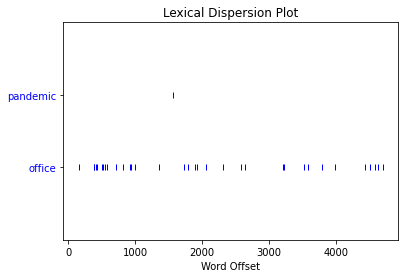

In [ ]:
# display the position information of a word in the text:
token_text.dispersion_plot(['pandemic', 'office'])

In [ ]:
# common_contexts examines the contexts shared by 'number' and 'office'
token_text.common_contexts(['number', 'office'])

the_i


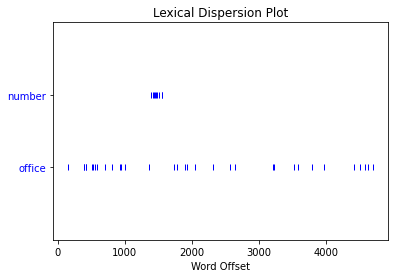

In [ ]:
# display the position information of a word in the text:
nltk.text.Text(token_corpus).dispersion_plot(['number', 'office'])

# Step 6: Simple Text Statistics

In [ ]:
# return total number of tokens in a text object before basic preprocessing
print(len(token_corpus))
# return total number of unique tokens
print(len(set(token_corpus)))

4817
1104


In [ ]:
# return total number of tokens in a text object after basic preprocessing
print(len(corpus))
# return total number of unique tokens
print(len(set(corpus)))

1964
857


In [ ]:
# lexical diversity is the total number of tokens over unique tokens
def lexical_diversity(text):
    """
    A measure of the lexical richness of the text
    """
    return len(text)/len(set(text))

In [ ]:
# Test on the first review
# calculate lexical diversity of reviews
print(lexical_diversity(review_preprocess_list[0]))

1.1764705882352942


In [ ]:
# Calculate lexical diversity for first ten review
lexical_diversity_table = []
for i in range(10):
  lexical_diversity_table.append([len(review_token_list[i]), len(review_preprocess_list[i]), lexical_diversity(review_preprocess_list[i])])
print(*lexical_diversity_table, sep= '\n')

[139, 60, 1.1764705882352942]
[41, 20, 1.0526315789473684]
[142, 64, 1.0847457627118644]
[57, 20, 1.1111111111111112]
[178, 79, 1.3389830508474576]
[28, 8, 1.0]
[109, 44, 1.0731707317073171]
[100, 40, 1.0526315789473684]
[151, 54, 1.3170731707317074]
[51, 19, 1.0555555555555556]


In [ ]:
# use the df1 to show the result
df1 = pd.DataFrame(lexical_diversity_table)
df1.columns = ['Review Length', 'Cleaned Review Length', 'Lexical Diversity']
df1

,Review Length,Cleaned Review Length,Lexical Diversity
0,139,60,1.176471
1,41,20,1.052632
2,142,64,1.084746
3,57,20,1.111111
4,178,79,1.338983
5,28,8,1.000000
6,109,44,1.073171
7,100,40,1.052632
8,151,54,1.317073
9,51,19,1.055556


# Step 7: Frequency Distribution Plot

In [ ]:
# first, we need sort the items based on the count
fdist_reviews_list = sorted(fdist_reviews.items(), key=lambda x:x[1], reverse= True)
# Then, we create a dictionary with the first 20 items
top20_tokens = dict(fdist_reviews_list[:20])
# print the top 20 tokens and their count
for k in top20_tokens:
  print (k, top20_tokens [k])

office 34
kokhab 24
get 23
doctor 22
time 21
would 18
staff 15
pain 13
seen 12
mary 12
appointment 12
back 12
help 11
first 11
great 11
even 11
like 10
see 10
could 10
care 10


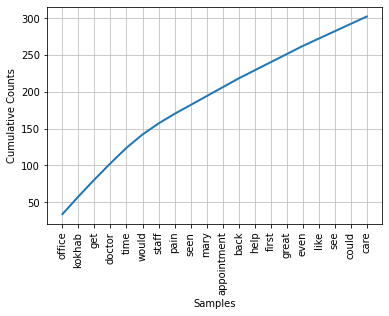

In [ ]:
# draw the frequency distribution plot
fdist_reviews.plot(20, cumulative=True)